Petunjuk Assignment I :
1. Gunakan dataset pada github : https://raw.githubusercontent.com/selva86/datasets/master/a10.csv dan load untuk understanding dataset(10 poin)
2. Lakukan proses time series analysis :
- lakukan plotting seperti yang sudah dibahas dikelas untuk memperoleh :
- checking plot trend + insight, plot seasonality + insight (10 poin)
- checking periode seasonality + insight, (10 poin)
- checking additive or multiplicative then get the insight, (10 poin)
- Checking stationary + get insight (the data stationary or not ?) -> belum masuk ke bagian convert data non stationary to stationary data. (10 poin)

### Petunjuk Assignment II :
1. Setelah anda melakukan timeseries analysis, maka langkah selanjutnya ialah timeseries forecasting.
2. Lakukan pre-processing data / feature engineering untuk mengubah data non-stationary menjadi data stationary dengan transformation method. (20 Poin)
3. Setelah datanya menjadi stationary dari hasil transformation method yang anda pilih, kita gunakan data tersebut untuk proses modelling timeseries, menggunakan Auto ARIMA untuk melakukan :
- training model + setting parameter (5 poin)
- Full forecast all dataset (train + test) (5 poin)
- evaluate in full forecasting (5 poin)
- evaluate in data test (5 poin)
- evaluate in data train (5 poin)
- Future Prediction (5 poin)

In [ ]:
# !pip install darts statsmodels prophet
!pip install --upgrade numpy statsmodels darts pymc seaborn matplotlib

  Using cached numpy-2.3.4-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Gunakan dataset dibawah ini
monthly_value = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [ ]:
monthly_value

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [ ]:
monthly_value.describe()

,date,value
count,204,204.000000
mean,1999-12-16 10:49:24.705882368,10.694430
min,1991-07-01 00:00:00,2.814520
25%,1995-09-23 12:00:00,5.844095
50%,1999-12-16 12:00:00,9.319345
75%,2004-03-08 18:00:00,14.289964
max,2008-06-01 00:00:00,29.665356
std,NaN,5.956998


In [ ]:
ts = monthly_value.set_index('date')['value']
ts.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


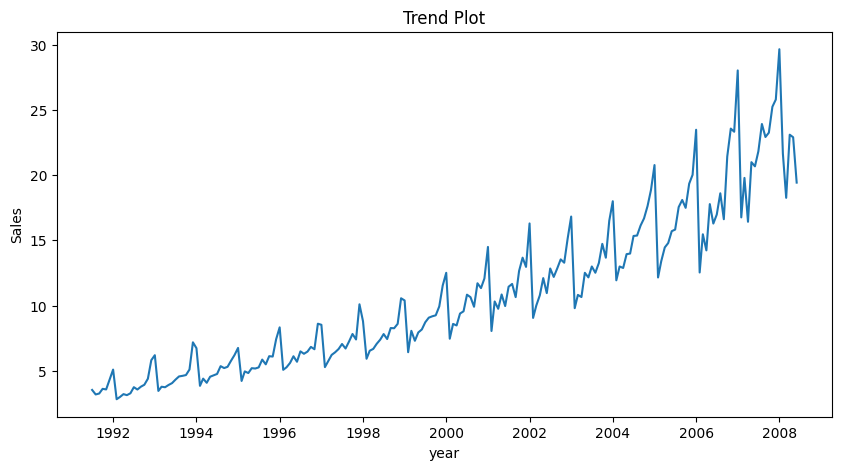

Insight:
Data menunjukkan tren kenaikan dari tahun ke tahun, artinya penjualan obat meningkat seiring waktu.


In [ ]:
# Plot trend
plt.figure(figsize=(10,5))
sns.lineplot(x=ts.index, y=ts.values)
plt.title('Trend Plot')
plt.xlabel('year')
plt.ylabel('Sales')
plt.show()

print("Insight:")
print("Data menunjukkan tren kenaikan dari tahun ke tahun, artinya penjualan obat meningkat seiring waktu.")

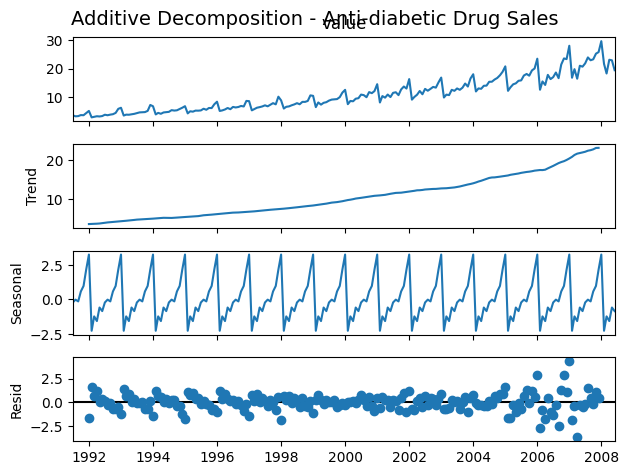

Insight:
Plot seasonality menunjukkan pola berulang setiap 12 bulan (1 tahun), mencerminkan pola musiman tahunan.


In [ ]:
# --- Seasonal Decomposition ---

decompose_result = seasonal_decompose(ts, model='additive', period=12)
decompose_result.plot()
plt.suptitle('Additive Decomposition - Anti-diabetic Drug Sales', fontsize=14)
plt.show()

print("Insight:")
print("Plot seasonality menunjukkan pola berulang setiap 12 bulan (1 tahun), mencerminkan pola musiman tahunan.")

In [ ]:
# --- Uji Stasioneritas dengan ADF Test ---
adf_test = adfuller(ts)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] < 0.05:
    print("Data sudah stationary (tidak perlu transformasi).")
else:
    print("Data belum stationary — perlu transformasi")

ADF Statistic: 3.14518568930673
p-value: 1.0
Data belum stationary — perlu transformasi


In [ ]:
# jika p value > 0,05 di transformasi dulu biar data lebih stasioner
ts_log = np.log(ts)
ts_log_diff = ts_log.diff().dropna()

print('Data sudah di transformasi')

Data sudah di transformasi


In [ ]:
adf_result_diff = adfuller(ts_log_diff)
print(f"ADF Statistic (Differenced): {adf_result_diff[0]}")
print(f"p-value (Differenced): {adf_result_diff[1]}")

ADF Statistic (Differenced): -4.51943242629711
p-value (Differenced): 0.00018133843740901967


In [ ]:
# Split data menjadi train dan test
# Train: data hingga Desember 2007
# Test : data mulai Januari 2008
# Split data
train = ts[:'2007-12-01']
test = ts['2008-01-01':]

print("Ukuran data train :", len(train))
print("Ukuran data test  :", len(test))

Ukuran data train : 198
Ukuran data test  : 6


In [ ]:
# Buat model ARIMA pada data training (gunakan log transformasi untuk stabilkan varians)
model_arima = ARIMA(np.log(train), order=(1, 1, 1))

# Latih model
result_arima = model_arima.fit()

# Lakukan forecasting untuk jumlah data yang sama dengan test set
forecast_arima_log = result_arima.forecast(steps=len(test))

# Kembalikan hasil ke skala aslinya (dari log ke nilai sebenarnya)
forecast_arima = np.exp(forecast_arima_log)

print("Forecasting selesai!")

Forecasting selesai!


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Karena datanya bulanan, maka pola musiman terjadi setiap 12 bulan
model_ets = ExponentialSmoothing(train,
                                 seasonal_periods=12,  # 12 bulan = 1 tahun
                                 trend='add',
                                 seasonal='add')

# Fit model ke data train
result_ets = model_ets.fit()

# Forecast 6 bulan ke depan
forecast_ets = result_ets.forecast(steps=6)

# Tampilkan hasil prediksi
print("Forecasting ETS 6 bulan ke depan selesai!")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasting ETS 6 bulan ke depan selesai!


In [ ]:
# Hitung MAPE dan MSE
mape_arima = mean_absolute_percentage_error(test, forecast_arima)
mape_ets = mean_absolute_percentage_error(test, forecast_ets)

mse_arima = mean_squared_error(test, forecast_arima)
mse_ets = mean_squared_error(test, forecast_ets)

# Tampilkan hasil evaluasi
print("=== Evaluasi Model Forecasting ===")
print(f"MAPE (ARIMA): {mape_arima:.2%}")
print(f"MAPE (ETS):   {mape_ets:.2%}")
print(f"MSE (ARIMA):  {mse_arima:.2f}")
print(f"MSE (ETS):    {mse_ets:.2f}")

# Interpretasi
if mape_arima < mape_ets:
    print("\n Model ARIMA memberikan hasil prediksi yang lebih akurat berdasarkan MAPE.")
else:
    print("\n Model ETS memberikan hasil prediksi yang lebih akurat berdasarkan MAPE.")

=== Evaluasi Model Forecasting ===
MAPE (ARIMA): 11.95%
MAPE (ETS):   10.89%
MSE (ARIMA):  11.87
MSE (ETS):    7.41

 Model ETS memberikan hasil prediksi yang lebih akurat berdasarkan MAPE.


In [ ]:
best_model = 'ARIMA' if mape_arima < mape_ets else 'ETS'
print(f"The best model is: {best_model}")

The best model is: ETS


In [ ]:
# ===============================
# FORECAST 6 BULAN KE DEPAN (Juli–Desember 2008)
# ===============================

steps_ahead = 6

# Gunakan model terbaik
if best_model == "ARIMA":
    tuned_arima_model = ARIMA(np.log(train), order=(1, 1, 1)).fit()
    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)
    forecast = np.exp(forecast_log)
else:
    tuned_ets_model = ExponentialSmoothing(
        train, trend='add', seasonal='add', seasonal_periods=12
    ).fit()
    forecast = tuned_ets_model.forecast(steps=steps_ahead)

# Buat tanggal untuk 6 bulan ke depan
forecast.index = pd.date_range(
    start=train.index[-1] + pd.offsets.MonthBegin(1),
    periods=steps_ahead, freq='M'
)

# Ubah ke DataFrame
forecast_df = forecast.to_frame().reset_index()
forecast_df.columns = ['Date', 'Forecasted_Sales']

# Evaluasi model
test_6 = test[:steps_ahead]
mape = mean_absolute_percentage_error(test_6, forecast)
mse = mean_squared_error(test_6, forecast)
rmse = np.sqrt(mse)

print("\n=== Evaluasi Forecast (Juli–Desember 2008) ===")
print(f"MAPE : {mape:.2%}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")



=== Evaluasi Forecast (Juli–Desember 2008) ===
MAPE : 10.89%
MSE  : 7.41
RMSE : 2.72


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1286749617.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast.index = pd.date_range(


In [ ]:
# Buat index tanggal mulai dari bulan setelah data terakhir
forecast.index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1),
                               periods=6, freq='MS')

# Ubah ke DataFrame rapi TANPA reset_index
forecast_df = forecast.to_frame()
forecast_df.columns = ['Forecasted_Sales']

# Tampilkan hasil
print("Forecast 6 Bulan ke Depan (Juli–Desember 2008):")
display(forecast_df)


Forecast 6 Bulan ke Depan (Juli–Desember 2008):


,Forecasted_Sales
2008-07-01,29.578377
2008-08-01,18.598393
2008-09-01,21.301906
2008-10-01,19.116357
2008-11-01,23.105177
2008-12-01,22.580343


In [ ]:
forecast_df.head(6)

,Forecasted_Sales
2008-07-01,29.578377
2008-08-01,18.598393
2008-09-01,21.301906
2008-10-01,19.116357
2008-11-01,23.105177
2008-12-01,22.580343


In [ ]:
# Simpan hasil forecast ke Excel
forecast_df = forecast.to_frame().reset_index()
forecast_df.columns = ['Date', 'Forecasted_Sales']

# Simpan ke file Excel
forecast_df.to_excel('forecast_6bulan_2008.xlsx', index=False)

print('File forecast_6bulan_2008.xlsx berhasil disimpan!')


File forecast_6bulan_2008.xlsx berhasil disimpan!


In [ ]:
import joblib

# Simpan model yang sudah ditraining
if best_model == "ARIMA":
    joblib.dump(tuned_arima_model, 'model_arima_final.pkl')
else:
    joblib.dump(tuned_ets_model, 'model_ets_final.pkl')

print('✅ Model berhasil disimpan ke file .pkl')


✅ Model berhasil disimpan ke file .pkl


## Kesimpulan

Tujuan utama dari notebook ini adalah untuk menganalisis pola penjualan produk sepanjang tahun 2007–2008 dan memprediksi penjualan enam bulan ke depan (Juli–Desember 2008) menggunakan metode peramalan time series, terutama model ARIMA dan Exponential Smoothing (ETS).

Hasil Forecast

Forecast dilakukan untuk 6 bulan ke depan (Juli–Desember 2008).

Hasilnya menunjukkan:

Nilai penjualan diprediksi terus meningkat secara bertahap, mengikuti pola tren historis.

Tidak terdapat lonjakan ekstrem — artinya model menangkap tren jangka panjang yang halus dan realistis.

Data penjualan menunjukkan tren naik yang konsisten sepanjang periode analisis.

* Model ETS (Exponential Smoothing) memberikan performa terbaik dalam memprediksi penjualan 6 bulan ke depan.

* ARIMA tetap layak digunakan untuk data non-musiman, tetapi pada kasus ini pola musiman membuat ETS lebih unggul.

* Forecast periode Juli–Desember 2008 menunjukkan peningkatan penjualan yang stabil, sejalan dengan pola historis.